#### Things to Try
1. Try directly train classifier without Language Model fine-tuning
    - Conditioned on a given text, generate texts with fine-tuned
    - Generate again WITHOUT fine-tuned
2. Try to recover the state (Databunch, partially trained model)
3. Check out how Language Model is trained (supervised? unsupervised?)
4. Visualize latent space for different semantic (WITH v.s. WITHOUT fine-tuning)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

#### 1. Load in Data and Model (without Fine-tune)

In [3]:
bs = 48
path = untar_data(URLs.IMDB)

In [4]:
data_clas = load_data(path, 'data_clas.pkl', bs = bs)

In [5]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos * * xxmaj attention xxmaj spoilers * * \n \n xxmaj first of all , let me say that xxmaj rob xxmaj roy is one of the best films of the 90 's . xxmaj it was an amazing achievement for all those involved , especially the acting of xxmaj liam xxmaj neeson , xxmaj jessica xxmaj lange , xxmaj john xxmaj hurt , xxmaj brian xxmaj cox",pos
"xxbos xxmaj some have praised _ xxunk _ as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older",neg
"xxbos xxmaj some have praised xxunk xxmaj lost xxmaj xxunk as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of",neg
"xxbos xxmaj here are the matches . . . ( adv . = advantage ) \n \n xxmaj the xxmaj warriors ( xxmaj ultimate xxmaj warrior , xxmaj texas xxmaj tornado and xxmaj legion of xxmaj doom ) v xxmaj the xxmaj perfect xxmaj team ( xxmaj mr xxmaj perfect , xxmaj ax , xxmaj smash and xxmaj crush of xxmaj demolition ) : xxmaj ax is the first",neg


#### 2. Find Good Learning Rate

In [6]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


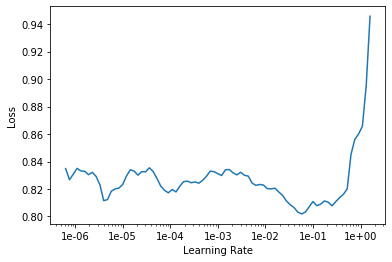

In [14]:
learn.recorder.plot()

#### 3. Incremental Training (on More Layers)

In [10]:
learn.fit_one_cycle(2, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.694205,0.696254,0.442240,27:11
1,0.689991,0.691999,0.512640,32:16


In [11]:
learn.save('first')

In [12]:
learn.load('first');

In [13]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.678965,0.665264,0.631880,05:16


In [14]:
learn.save('second')

In [15]:
learn.load('second');

In [16]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.576077,0.544759,0.734760,06:23


In [17]:
learn.save('third')

In [7]:
learn.load('third');

In [8]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.551202,0.513344,0.756040,08:06
1,0.463466,0.402578,0.824320,05:45
2,0.373074,0.359667,0.838000,05:39
3,0.322002,0.308401,0.869160,05:36
4,0.285316,0.296348,0.874640,05:27
5,0.268584,0.286999,0.879240,05:05
6,0.243693,0.270516,0.888400,04:57
7,0.246897,0.266772,0.890120,05:17


In [8]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.226146,0.255417,0.895200,08:10
1,0.213130,0.257372,0.895000,05:04


In [11]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.200890,0.262971,0.893080,07:25
1,0.181472,0.250942,0.899440,04:58


In [12]:
learn.save('final')

In [7]:
learn.load('final')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj obviously made to show famous 1950s stripper xxmaj misty xxmaj ayers " acting " talents . xxmaj too bad she ca n't act . 
 
  xxmaj boring little tale about sweet , innocent xxmaj sally xxmaj down ( xxmaj ayers ) being drugged and forced into white slavery ( prostitution ) . xxmaj then she meets likable xxmaj tommy xxmaj cole who instantly falls in love with her . xxmaj he wants to help her escape but can he ? xxmaj you really wo n't care . 
 
  xxmaj there 's no real skin here -- xxmaj ayers just strips down xxup slowly to her underwear ( twice ) . xxmaj the rest is just a boring little tale chockful of bad acting , atrocious " comedy " ( never thought prostitution was funny but what do i know ? ) and terrible post - dubbed dialogue . i admit there was a twist at the end i did n't see coming but that 's not enough to sit through this . xxmaj also xxmaj ayers ' attempts at acting are hysterical !

#### 4. Inference

In [10]:
learn.predict('I like this movie very much!')

(Category pos, tensor(1), tensor([0.0169, 0.9831]))